In [2]:
# loading the library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# loading the data
df=pd.read_csv(r"C:\Users\JEEVAN\Downloads\autopriceTree.csv")
df.head()

,fueltype,length,curbweight,horsepower,price
0,gas,168.8,2548,111,13495
1,gas,168.8,2548,111,16500
2,gas,171.2,2823,154,16500
3,gas,176.6,2337,102,13950
4,gas,176.6,2824,115,17450


In [4]:
df.shape

(199, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    199 non-null    object 
 1   length      199 non-null    float64
 2   curbweight  199 non-null    int64  
 3   horsepower  199 non-null    int64  
 4   price       199 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

fueltype      0
length        0
curbweight    0
horsepower    0
price         0
dtype: int64

In [7]:
df.fueltype.value_counts()

gas       179
diesel     20
Name: fueltype, dtype: int64

In [8]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [9]:
# where i am going to convert gas as 0 and diesel as 1
# where we have fueltype in object lets convert into int

df.fueltype=df.fueltype.replace(['gas', 'diesel'],[0,1]).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    199 non-null    int32  
 1   length      199 non-null    float64
 2   curbweight  199 non-null    int64  
 3   horsepower  199 non-null    int64  
 4   price       199 non-null    int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 7.1 KB


In [11]:
# lets split the data in to train and test
# before that we want to keep all our feature(predictors) and target variable oneside
x=df.loc[:,df.columns!='price']
y=df.loc[:,df.columns=='price']

In [12]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)       # you can give any random state and you can split the data how ever you want, here i took 80:20 ratio

In [13]:
# fit the tree on train data
# will build the model using decisiontree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

regr=DecisionTreeRegressor()      # here we are building the model on full depth so that we have not metioned any max depth over model 
# fit the regression model on train set
regr.fit(x_train,y_train)
# predict/estimate_train x_train
yest_train=regr.predict(x_train)

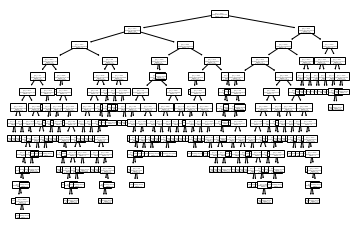

In [14]:
# see the tree of the train data
from sklearn import tree
tree.plot_tree(regr.fit(x_train,y_train))
plt.show()

In [15]:
# the total depth of the tree is 13

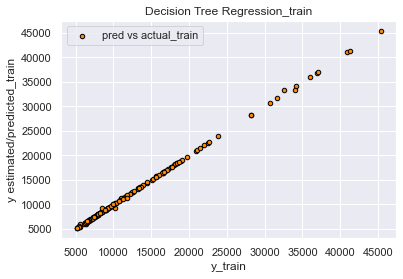

In [31]:
# train data,13 deep

# plot the results;
# looks that tree has learnt everything
plt.figure()
plt.scatter(y_train,yest_train,s=20,edgecolor='black',c='darkorange',label='pred vs actual_train')
plt.xlabel('y_train')
plt.ylabel('y estimated/predicted_train')
plt.title('Decision Tree Regression_train')
plt.legend()
plt.show()

In [32]:
# mse/rmse_train
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,yest_train)
print(mse_train)

21396.270440251574


In [33]:
# mse for test data
# predict/estimate_test x_est

yest_test=regr.predict(x_test)

In [28]:
# converting y_test into series
y_test=y_test.iloc[:,0]

IndexingError: Too many indexers

In [34]:
# residual test   (error)
test_residual=y_test-yest_test

In [35]:
# mse/rmse of test
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(y_test,yest_test)
print(mse_test)

17313259.35


In [40]:
# find optimum no of depth
# here we are going to build the model no the basis of maxdepth and check on which depth the train, test error is minimum
# here i am going to build the model again on depth of random number like(5,6,7,8,9,10,11,12)  where the max depth of tree =13  and based on the depth i amd finding that the tree is not overfitting(overfitting:- it performs very well in the train data but once it comes to test data it fails and the accuracy will go down)
depth=[5,6,7,8,9,10,11,12]
mse_train,mse_test=[],[]

for i in depth:
    prdctr=DecisionTreeRegressor(max_depth=i)    # we are telling that the max depth of the tree should by (i)
    prdctr.fit(x_train,y_train)                  # we are building model only on train data not for test data
    y_train_pred=prdctr.predict(x_train)
    y_test_pred=prdctr.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))


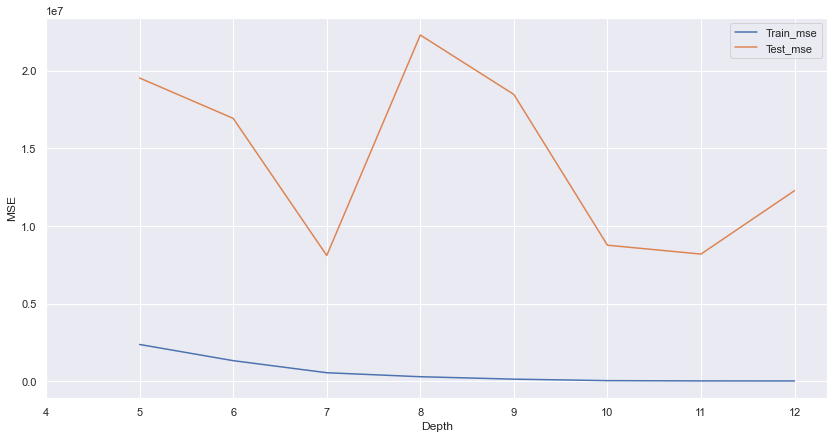

In [41]:
# now we have mse for train and test with different depth like [5,6,7,8,9,10,11,12]
# lets plot it
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=mse_train,x=depth,label='Train_mse')
sns.lineplot(y=mse_test,x=depth,label='Test_mse')
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.xticks(ticks=np.arange(4,13,1))
plt.show()

In [39]:
# their is less error on train and more error or test it leads to over fitting so we take the mindistance of train and test

### where in dept 6 we have minimum difference so we are considering the dept 7

In [42]:
# Now we are going to finalizing our tree with dept=7

In [43]:
# Above we have performed by using DecisionTreeRegressor         # why we call it as Decision Tree regressor (here we have performed on only one tree and took the decision howmuch depth of tree was good and was giving less mse on both train and test)

# Now we are going to perform using RandomForestRegressor       # why we call it as random forest regressor (here we have to perform on n-number of tree(ex:-100 or 500 your wish) so for multiple tree we are calling it as random forest)

In [44]:
# Random Forest Regression       

from sklearn.ensemble import RandomForestRegressor

#create regressor object (model)
# In our previous experiment, we found 7 is the best dept
regressor=RandomForestRegressor(n_estimators=100,max_depth=7,random_state=0)         # n_estimator = no of trees we going to plot =for ex we are ploting 100 trees wwith maximum depth of 6

# fit the regressor with x and y data --train
mod=regressor.fit(x_train,y_train)           # building the random forest model on train data
                                         
# Prediction       
y_pred=mod.predict(x_test)              # now we are going to predict on test data 

In [45]:
# RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

10291193.329258585

In [46]:
rmse=np.sqrt(mse)
rmse

3207.9889852146603

In [47]:
y_test.shape

(40,)

In [48]:
obsno=np.arange(40)
resid=y_test-y_pred       # residuals(error)

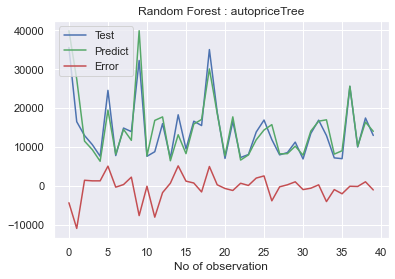

In [49]:
# lets plot the residuals   with actual and predicted 

plt.plot(obsno,y_test,'b')
plt.plot(obsno,y_pred,'g')
plt.plot(obsno,resid,'r')
plt.xlabel('No of observation')
plt.title('Random Forest : autopriceTree')
plt.legend(labels=('Test','Predict','Error'),loc='upper left')
plt.show()

# The above one is the 1ST Model using Random forest Regressor [For all the variable with max_depth=7]

### Now will build another model by keeping only good predictors [selection of good predictor is done by feature importance] :- after building the model it check and say that which feature is playing howmuch importance while predicting the model   if the feature having low importance we are just droping those feature

In [50]:
# Extract Feature importance

fi=pd.DataFrame({'feature':list(x_train.columns),'importance':mod.feature_importances_}).sort_values('importance',ascending=False)
fi

,feature,importance
2,curbweight,0.550861
3,horsepower,0.402847
1,length,0.041460
0,fueltype,0.004832


In [51]:
# where its telling that curbweight and horsepower feature is very important feature

In [52]:
# we can build a model which has high feature importance
# ex:- lets consider curbweight and horsepower

# import the regressor

### Again we are going to build a model on Random forest regressor by keeping only which has higest importance feature   [Model 2]

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
# create regressor object
# in our previous expreimen,we found 6 is the best depth  so we are considering that the max depth of the tree is 6
regressor=RandomForestRegressor(n_estimators=100,max_depth=7,random_state=0)

In [55]:
# fit the regressor with x and y data=Train,this time with curbweight and horsepower only
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 97 to 158
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    159 non-null    int32  
 1   length      159 non-null    float64
 2   curbweight  159 non-null    int64  
 3   horsepower  159 non-null    int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 5.6 KB


In [56]:
x_train1=x_train.iloc[:,[2,3]]
x_train1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 97 to 158
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   curbweight  159 non-null    int64
 1   horsepower  159 non-null    int64
dtypes: int64(2)
memory usage: 3.7 KB


In [57]:
# now we have selected only 2 features and using that will build the model
mod1=regressor.fit(x_train1,y_train)

In [58]:
# prediction
x_test.info()
x_test1=x_test.iloc[:,[2,3]]      # here x-test also should have only those 2 feature which are present in the x_train 
y_pred1=mod1.predict(x_test1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 45 to 28
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    40 non-null     int32  
 1   length      40 non-null     float64
 2   curbweight  40 non-null     int64  
 3   horsepower  40 non-null     int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 1.4 KB


In [59]:
# RMSE
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test,y_pred1)
mse1

9509829.153861312

In [60]:
rmse=np.sqrt(mse1)
rmse

3083.8010885693184

In [62]:
# For all 4 variables i was getting rmse=3207
# For only 2 variables i am getting rmse=3083

In [63]:
y_test.shape

(40,)

In [64]:
# Always i want to plot a graph on Test(actual),Predicted,Error      (y_test,y_pred,residuals)

In [65]:
obsno=np.arange(40)
resid1=y_test-y_pred1

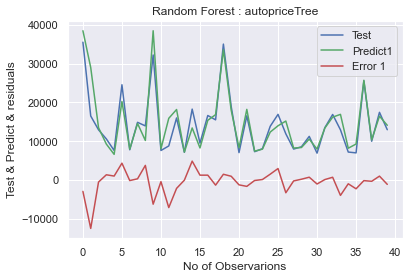

In [66]:
#plot 
plt.plot(obsno,y_test,'b')
plt.plot(obsno,y_pred1,'g')
plt.plot(obsno,resid1,'r')
plt.xlabel('No of Observarions')
plt.ylabel('Test & Predict & residuals')
plt.title('Random Forest : autopriceTree')
plt.legend(labels=('Test','Predict1','Error 1'),loc='upper right')
plt.show()

In [67]:
# Now we built 2 Model using Random Forest Regressor
# Model1:-  with all the feature with depth of 6
# Model2:-  with only selected features which has high feature importance [using :- curbweight,horsepower] this 2 features


## Now lets build our 3rd Model using GridSearch

## GridSearchCV and RandomSearchCV are both are Hyper tuning Parameter

In [76]:
# Grid Search 
from sklearn.model_selection import GridSearchCV        # CV[cross validation]   

param_grid={'bootstrap':[True],'max_depth':[5,6,7,8,9,10,11],'max_features':['auto','log2'],'n_estimators':[25,50,100,150,200]}   # where auto is nothing but (square root), n_estimators =no of tree (first it will build 25 tree and it will build 50 tree and goes on)
rfr=RandomForestRegressor(random_state=1)
g_search=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3)
gmod=g_search.fit(x_train1,y_train)                      # building model using gridSearch

In [77]:
# best parametrs
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 25}


In [78]:
x_test1.shape

(40, 2)

In [79]:
gprd=gmod.predict(x_test1)
# RMSE
from sklearn.metrics import mean_squared_error
mse_g=mean_squared_error(y_test,gprd)

In [80]:
RMSE_g=np.sqrt(mse_g)
print(RMSE_g)

3090.7072911711684


In [81]:
# For all 4 variables i was getting rmse=3330
# For only 2 variables i am getting rmse=3235
# while using gridsearchCV we are getting rmse=3091 

In [83]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor(bootstrap=True,max_depth=7,max_features='log2',n_estimators=25)

In [84]:
regressorfit=regressor1.fit(x_train1,y_train)

In [85]:
y_pred2=regressorfit.predict(x_test1)

In [86]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(y_test,y_pred2)

In [87]:
rmse2=np.sqrt(mse2)
rmse2

3018.0823203063583

In [ ]:
# For all 4 variables i was getting rmse=3330
# For only 2 variables i am getting rmse=3235
# by using the gridsearch we have selected the parameter and we got the rmse has=3018

## Now will perform using RandomSearch 

In [92]:
# using random search
from sklearn.model_selection import RandomizedSearchCV
rfr_random=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,n_iter=20,cv=3,random_state=421)
rmod=rfr_random.fit(x_train1,y_train)        # building model using random frest

In [93]:
# best parameter,  hyper tuned
print(rmod.best_params_)

{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 11, 'bootstrap': True}


In [94]:
rprd=rmod.predict(x_test)

In [95]:
# RMSE
from sklearn.metrics import mean_squared_error
mse_r=mean_squared_error(y_test,rprd)
mse_r

8575668.36821634

In [96]:
RMSE_r=np.sqrt(mse_r)
print(RMSE_r)                    # this is the rmse of grid search not the real rmse 

2928.4242124761126


In [97]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor(bootstrap=True,max_depth=11,max_features='log2',n_estimators=200)

In [98]:
regressorfit=regressor1.fit(x_train1,y_train)

In [99]:
y_pred2=regressorfit.predict(x_test1)

In [100]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(y_test,y_pred2)

In [101]:
rmse2=np.sqrt(mse2)
rmse2

2899.6748594825185

In [102]:
# For all 4 variables i was getting rmse=3330
# For only 2 variables i am getting rmse=3235
# by using the gridsearch we have selected the parameter and we got the rmse has=3018
# by using the randomsearchcv we have selected the parameter and we got the rmse has 2899

In [129]:
from timeit import default_timer

# using grid search
begining=default_timer()
gmod=g_search.fit(x_train1,y_train)
ending =default_timer()
print((ending-begining))

82.30864060000022


In [128]:
from timeit import default_timer

# using random search
begining=default_timer()
rmod=rfr_random.fit(x_train1,y_train)
ending=default_timer()
print((ending-begining))

34.400859800000035


In [138]:
# where grid search is taking 1.36 min and where randomsearch is taking just 35 sec